# Na aula anterior...

Qual a importância de realizar um grid search?

Qual utilidade das Pipelines do sklearn dentro do universo de Ciência de Dados?

# Hoje!

**Para vocês**: otimizem os hiperparâmetros de um dos modelos de vocês.

**Para vocês**: organizem o projeto de vocês para que o pré-processamento e o modelo esteja no formato de pipeline.

## SVM

- Material complementar: [Aula do professor Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o)
- Todos os modelos de classificação possuem um [fronteira de decisão](https://ml-playground.com/).
- Algoritmos já vistos não são construídas em torno desse conceito. 
- O objetivo do SVM é encontrar uma fronteira que consiga separar o conjunto de dados em classes positivas e negativas
- Em um plano, existe um conjunto infinito de linhas que podem seperar duas classes
- Mas, qual o melhor?

<center><img src="https://s3-sa-east-1.amazonaws.com/lcpi/fceb4ea0-9de8-4048-9cc4-c9d4355b671c.png" width = 25%/></center>

- Aplicando com sklearn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
x1_mais = [-3, -2.5, -2, 3, 2.5, 3]
x2_mais = [0] * len(x1_mais)

x1_menos = [2, 5, 8, 9]
x2_menos = [0] * len(x1_menos)

In [24]:
df = pd.DataFrame({
    'x1': x1_mais + x1_menos,
    'x2': x2_mais + x2_menos,
    'y': [1] * len(x1_mais) + [0] * len(x1_menos)
})

df

,x1,x2,y
0,-3.0,0,1
1,-2.5,0,1
2,-2.0,0,1
3,3.0,0,1
4,2.5,0,1
5,3.0,0,1
6,2.0,0,0
7,5.0,0,0
8,8.0,0,0
9,9.0,0,0


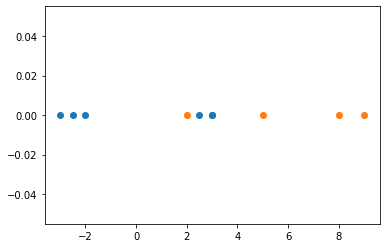

In [25]:
plt.scatter(df[df.y == 1].x1, df[df.y == 1].x2)
plt.scatter(df[df.y == 0].x1, df[df.y == 0].x2)

plt.show()

In [26]:
from sklearn.svm import SVC

In [27]:
modelo = SVC(kernel = 'linear')
modelo.fit(df[['x1', 'x2']], df['y'])

SVC(kernel='linear')

In [28]:
df['y_pred'] = modelo.predict(df[['x1', 'x2']])

In [29]:
df

,x1,x2,y,y_pred
0,-3.0,0,1,1
1,-2.5,0,1,1
2,-2.0,0,1,1
3,3.0,0,1,1
4,2.5,0,1,1
5,3.0,0,1,1
6,2.0,0,0,1
7,5.0,0,0,0
8,8.0,0,0,0
9,9.0,0,0,0


In [32]:
modelo.support_vectors_

array([[2., 0.],
       [5., 0.],
       [3., 0.],
       [3., 0.]])

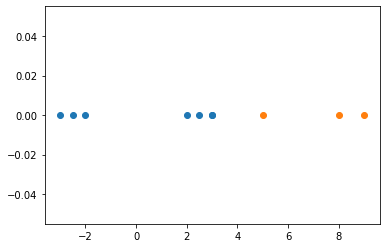

In [30]:
plt.scatter(df[df.y_pred == 1].x1, df[df.y_pred == 1].x2)
plt.scatter(df[df.y_pred == 0].x1, df[df.y_pred == 0].x2)

plt.show()

- Mostrando um caso linear.

- Esse algoritmo, apesar de lindo, é pouco prático as is, porque traça fronteiras lineares, mas o mundo não é linear. Então, durante 20 anos, o SVM ficou "engavatado" até que a ideia do Kernel Trick apareceu.

In [33]:
x1_mais = [-3, -2.5, -2, 3, 2.5, 3]
x2_mais = [0] * len(x1_mais)

x1_menos = [-1, 0, 0.5]
x2_menos = [0] * len(x1_menos)

In [34]:
df = pd.DataFrame({
    'x1': x1_mais + x1_menos,
    'x2': x2_mais + x2_menos,
    'y': [1] * len(x1_mais) + [0] * len(x1_menos)
})

df

,x1,x2,y
0,-3.0,0,1
1,-2.5,0,1
2,-2.0,0,1
3,3.0,0,1
4,2.5,0,1
5,3.0,0,1
6,-1.0,0,0
7,0.0,0,0
8,0.5,0,0


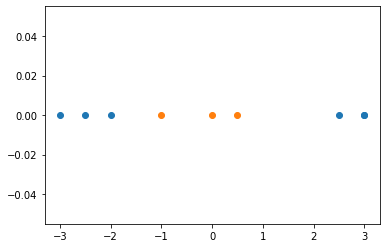

In [35]:
plt.scatter(df[df.y == 1].x1, df[df.y == 1].x2)
plt.scatter(df[df.y == 0].x1, df[df.y == 0].x2)

plt.show()

In [36]:
from sklearn.svm import SVC, SVR

In [37]:
modelo = SVC(kernel = 'linear')
modelo.fit(df[['x1', 'x2']], df['y'])

SVC(kernel='linear')

In [38]:
df['y_pred'] = modelo.predict(df[['x1', 'x2']])

In [39]:
df

,x1,x2,y,y_pred
0,-3.0,0,1,1
1,-2.5,0,1,1
2,-2.0,0,1,1
3,3.0,0,1,1
4,2.5,0,1,1
5,3.0,0,1,1
6,-1.0,0,0,1
7,0.0,0,0,1
8,0.5,0,0,1


In [47]:
df['x2'] = df['x1'].abs()

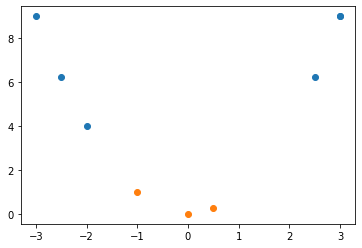

In [48]:
plt.scatter(df[df.y == 1].x1, df[df.y == 1].x2)
plt.scatter(df[df.y == 0].x1, df[df.y == 0].x2)

plt.show()

In [49]:
modelo = SVC(kernel = 'linear')
modelo.fit(df[['x1', 'x2']], df['y'])

SVC(kernel='linear')

In [50]:
df['y_pred'] = modelo.predict(df[['x1', 'x2']])

In [51]:
df

,x1,x2,y,y_pred
0,-3.0,9.00,1,1
1,-2.5,6.25,1,1
2,-2.0,4.00,1,1
3,3.0,9.00,1,1
4,2.5,6.25,1,1
5,3.0,9.00,1,1
6,-1.0,1.00,0,0
7,0.0,0.00,0,0
8,0.5,0.25,0,0


In [52]:
df['x2'] = 0

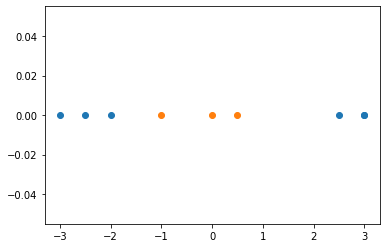

In [53]:
plt.scatter(df[df.y == 1].x1, df[df.y == 1].x2)
plt.scatter(df[df.y == 0].x1, df[df.y == 0].x2)

plt.show()

In [61]:
modelo = SVC(C, kernel = 'rbf')
modelo.fit(df[['x1', 'x2']], df['y'])

SVC()

In [62]:
df['y_pred'] = modelo.predict(df[['x1', 'x2']])

In [63]:
df

,x1,x2,y,y_pred
0,-3.0,0,1,1
1,-2.5,0,1,1
2,-2.0,0,1,1
3,3.0,0,1,1
4,2.5,0,1,1
5,3.0,0,1,1
6,-1.0,0,0,0
7,0.0,0,0,0
8,0.5,0,0,0


In [80]:
x1_mais = [-3, -2.5, -2]
x2_mais = [0] * len(x1_mais)

x1_menos = [-1, 0, 0.5]
x2_menos = [0] * len(x1_menos)

x1_neutro = [9, 10, 12]
x2_neutro = [0] * len(x1_menos)

In [81]:
df = pd.DataFrame({
    'x1': x1_mais + x1_menos + x1_neutro,
    'x2': x2_mais + x2_menos + x2_neutro,
    'y': [1] * len(x1_mais) + [0] * len(x1_menos) + [-1] * len(x1_neutro)
})

df

,x1,x2,y
0,-3.0,0,1
1,-2.5,0,1
2,-2.0,0,1
3,-1.0,0,0
4,0.0,0,0
5,0.5,0,0
6,9.0,0,-1
7,10.0,0,-1
8,12.0,0,-1


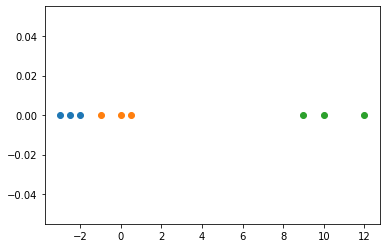

In [82]:
plt.scatter(df[df.y == 1].x1, df[df.y == 1].x2)
plt.scatter(df[df.y == 0].x1, df[df.y == 0].x2)
plt.scatter(df[df.y == -1].x1, df[df.y == -1].x2)

plt.show()

In [86]:
modelo = SVC(kernel = 'linear', degree = 5)
modelo.fit(df[['x1', 'x2']], df['y'])

SVC(degree=5, kernel='linear')

In [89]:
modelo.support_vectors_

array([[ 9. ,  0. ],
       [-1. ,  0. ],
       [ 0.5,  0. ],
       [-2. ,  0. ]])

In [87]:
df['y_pred'] = modelo.predict(df[['x1', 'x2']])

In [88]:
df

,x1,x2,y,y_pred
0,-3.0,0,1,1
1,-2.5,0,1,1
2,-2.0,0,1,1
3,-1.0,0,0,0
4,0.0,0,0,0
5,0.5,0,0,0
6,9.0,0,-1,-1
7,10.0,0,-1,-1
8,12.0,0,-1,-1


In [47]:
df['x2'] = df['x1'].abs()

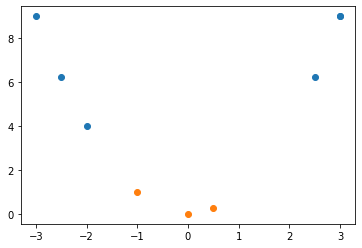

In [48]:
plt.scatter(df[df.y == 1].x1, df[df.y == 1].x2)
plt.scatter(df[df.y == 0].x1, df[df.y == 0].x2)

plt.show()

In [49]:
modelo = SVC(kernel = 'linear')
modelo.fit(df[['x1', 'x2']], df['y'])

SVC(kernel='linear')

In [50]:
df['y_pred'] = modelo.predict(df[['x1', 'x2']])

In [51]:
df

,x1,x2,y,y_pred
0,-3.0,9.00,1,1
1,-2.5,6.25,1,1
2,-2.0,4.00,1,1
3,3.0,9.00,1,1
4,2.5,6.25,1,1
5,3.0,9.00,1,1
6,-1.0,1.00,0,0
7,0.0,0.00,0,0
8,0.5,0.25,0,0


In [52]:
df['x2'] = 0

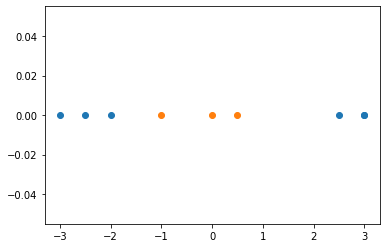

In [53]:
plt.scatter(df[df.y == 1].x1, df[df.y == 1].x2)
plt.scatter(df[df.y == 0].x1, df[df.y == 0].x2)

plt.show()

In [61]:
modelo = SVC(C, kernel = 'rbf')
modelo.fit(df[['x1', 'x2']], df['y'])

SVC()

In [62]:
df['y_pred'] = modelo.predict(df[['x1', 'x2']])

In [63]:
df

,x1,x2,y,y_pred
0,-3.0,0,1,1
1,-2.5,0,1,1
2,-2.0,0,1,1
3,3.0,0,1,1
4,2.5,0,1,1
5,3.0,0,1,1
6,-1.0,0,0,0
7,0.0,0,0,0
8,0.5,0,0,0


[Plot do decision boundary](https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface)

Outra opção pra decision boundary:

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm
from mlxtend.plotting import plot_decision_regions # Pacote para plotar o decision boundry
import matplotlib.pyplot as plt

# Criação do DataFrame
x1 = [-2.5, -3, -1, 5, 7, 8]
x2 = [0] * len(x1)
y = [0, 0, 0, 1, 1, 1]

dicionario = {'x1': x1, 'x2': x2, 'y': y}
df = pd.DataFrame(dicionario)
df

# Separação das variáveis explicativas e resposta
X = df[['x1', 'x2']]
y = df['y']

# Treinando o Modelo
modelo = svm.SVC()
modelo.fit(X, y)
# Utiliza o pacote para plotagem do decision boundry
plot_decision_regions(X=X.values, 
                      y=y.values,
                      clf=modelo, 
                      legend=2)